<a href="https://colab.research.google.com/github/ProfAndersonVanin/aulas_PA_2024/blob/main/09_10_24_1C_PA_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados**

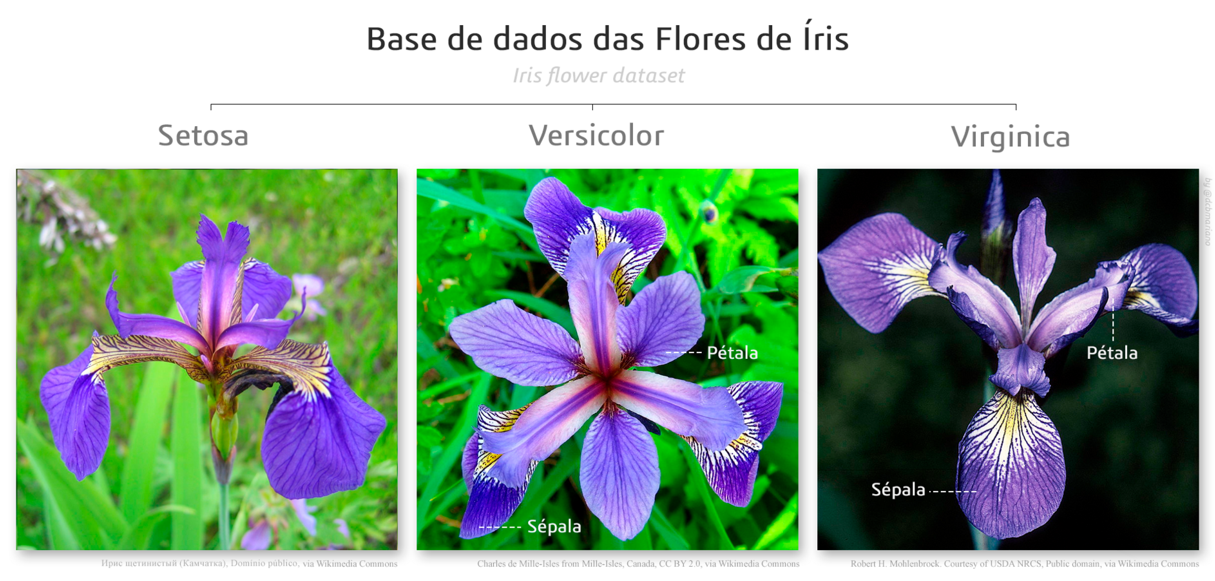

O conjunto de dados flor Iris ou conjunto de dados Iris de Fisher é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936, O uso de múltiplas medições em problemas taxonômicos, como um exemplo de análise discriminante linear. Às vezes, é chamado de conjunto de dados da íris de Anderson porque Edgar Anderson coletou os dados para quantificar a variação morfológica das flores da íris de três espécies relacionadas. Duas das três espécies foram coletadas na Península de Gaspé, "todas do mesmo campo, colhidas no mesmo dia e medidas ao mesmo tempo pela mesma pessoa com a mesma aparelho".

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris ( Iris setosa, Iris virginica e Iris versicolor). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. Com base na combinação dessas quatro características, Fisher desenvolveu um modelo discriminante linear para distinguir as espécies umas das outras.

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Carregando o dataset
iris = pd.read_csv("/content/iris.csv")

In [ ]:
# Visualizando os primeiros registros
iris.head()

In [ ]:
# Verificar tamanho da base e número de colunas
iris.shape

In [ ]:
# Quais são as colunas da base
iris.columns

In [ ]:
# Informações sobre dados nulos e tipos de dados para cada coluna
iris.info()

In [ ]:
# Dados únicos de uma determinada coluna
iris.species.unique()

# **Análise Estatística Simples**
**1. Estatísticas Descritivas:**

- Calcule a média, mediana e desvio padrão das características.

In [ ]:
# Estatísticas descritivas
iris.describe()

**2. Verificando a Distribuição das Espécies:**
- Contar o número de amostras de cada espécie.

In [ ]:
# Contagem de espécies
species_count = iris['species'].value_counts()
print(species_count)

# **Gráficos**
**1. Gráfico de Dispersão:**
- Visualizar a relação entre o comprimento e a largura das sépalas.

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', style='species')
plt.title('Dispersão das Sepalas por Espécie')
plt.xlabel('Comprimento da Sepala (cm)')
plt.ylabel('Largura da Sepala (cm)')
plt.legend(title='Espécies')
plt.show()

**2. Boxplot:**
- Comparar o comprimento das pétalas entre as diferentes espécies.

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x='species', y='petal_length')
plt.title('Comparação do Comprimento das Pétalas por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()

# **OUTRAS ANÁLISES**

# **Análise de Correlação**
- Calcular a correlação entre as variáveis numéricas pode ajudar a entender como elas estão relacionadas.

In [ ]:
# Matriz de correlação
correlation_matrix = iris.corr()
print(correlation_matrix)

# Heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

O erro que você encontrou ocorre porque a matriz de correlação só pode ser calculada para variáveis numéricas. A coluna "species" contém strings, que não podem ser convertidas em valores numéricos.

Para resolver isso, você deve primeiro selecionar apenas as colunas numéricas da base de dados. Veja como fazer isso corretamente:

In [ ]:
# Matriz de correlação apenas com variáveis numéricas
correlation_matrix = iris.select_dtypes(include=[float, int]).corr()
print(correlation_matrix)

# Heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

**Explicação**
- `select_dtypes(include=[float, int])` é usado para selecionar apenas as colunas que contêm dados numéricos (no caso, as características das flores Iris).

Assim, você evita o erro e consegue calcular a correlação corretamente.

# **Gráfico de Pairplot**
Visualizar todas as relações entre as variáveis em um único gráfico.

In [ ]:
# Pairplot
sns.pairplot(iris, hue='species')
plt.title('Pairplot das Características da Iris')
plt.show()

In [ ]:
cores = ['red','orange','blue']
tipos = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
  x = iris[iris['species'] == tipos[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c = cores[i], label=tipos[i])
plt.xlabel('Comprimento Petala')
plt.ylabel('Largura Petala')
plt.legend()

# **Distribuição das Variáveis**
Verificar a distribuição de cada variável usando histogramas.

In [ ]:
# Histogramas das características
iris.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribuição das Características da Iris')
plt.show()

# **Análise de Outliers**
Identificar e visualizar possíveis outliers nas variáveis.

In [ ]:
# Boxplot para identificar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris.drop(columns='species'))
plt.title('Identificação de Outliers nas Características da Iris')
plt.show()